In [1]:
import pandas as pd
url='http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names=['sepal_length','sepal_width','petal_length','petal_width','species']
iris=pd.read_csv(url,header=None,names=col_names)

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# allow plots to appearin the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize']=(6,4)
plt.rcParams['font.size']=14
# create a custom colormap named cmap_bold using the listedColormap class.
# it specifies three colors in hexadecimal format (FF0000 for red, 00F00 for blue, and green)

from matplotlib.colors import ListedColormap
cmap_bold=ListedColormap(['#FF0000','#00FF00','#0000FF'])

In [4]:
# map each iris species to a number
# This dictionart maps each iris species ('Iris-setosa'...)

iris['species_num']=iris.species.map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':3})

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

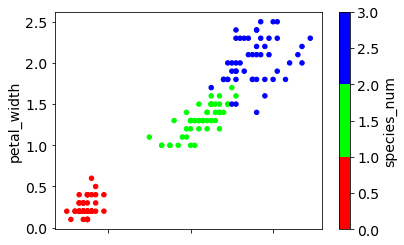

In [5]:
iris.plot(kind='scatter',x='petal_length',y='petal_width',c='species_num',colormap=cmap_bold)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

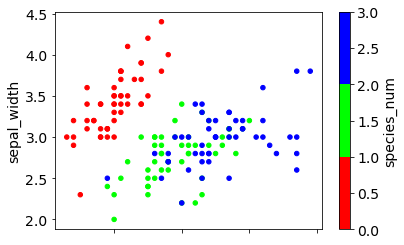

In [32]:
iris.plot(kind='scatter',x='sepal_length',y='sepal_width',c='species_num',colormap=cmap_bold)

In [8]:
# store feature matrix in "X"
feature_cols=['sepal_length','sepal_width','petal_length','petal_width']
X=iris[feature_cols]

In [9]:
X=iris.drop(['species','species_num'],axis=1)
X=iris.loc[:,'sepal_length':'petal_width']
X=iris.iloc[:,0:4]

In [10]:
y=iris.species_num

In [11]:
print(type(X))
print(type(X.values))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [12]:
print(type(y))
print(type(y.values))


<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [13]:
print(X.shape)

(150, 4)


In [14]:
print(y.shape)

(150,)


In [15]:
# this calss is used for implementing the K-nearest neighbors (KNN) algorith for classification 
from sklearn.neighbors import KNeighborsClassifier

In [16]:
# make an instance of a KNeighborsClassifier object
# Initializes the KNeighborsCLassifier object with the parameter n_neighbor set to 1
# Meaning it will consider only the nearest neigbor when making predictions.
knn=KNeighborsClassifier(n_neighbors=1)
type(knn)


sklearn.neighbors._classification.KNeighborsClassifier

In [17]:
print(knn)

KNeighborsClassifier(n_neighbors=1)


In [18]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [19]:
knn.predict([[3,5,4,2]])

D:\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=int64)

In [21]:
X_new=[[3,5,4,2],[5,4,3,2]]
knn.predict(X_new)

D:\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 1], dtype=int64)

In [22]:
# instantiate the model (using the value k=5)
knn=KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X,y)

# predict the response for new observations
knn.predict(X_new)

D:\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 1], dtype=int64)

In [23]:
# calculate predicted probabilities of class memebership
knn.predict_proba(X_new)

D:\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0. , 0.8, 0.2],
       [0. , 1. , 0. ]])